### Roadmap of Document:

Responses to questions are below.

Chatlogs and links are at the bottom.

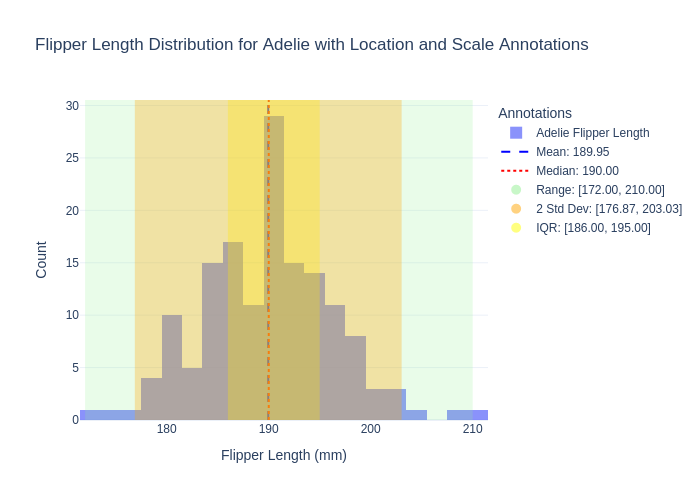

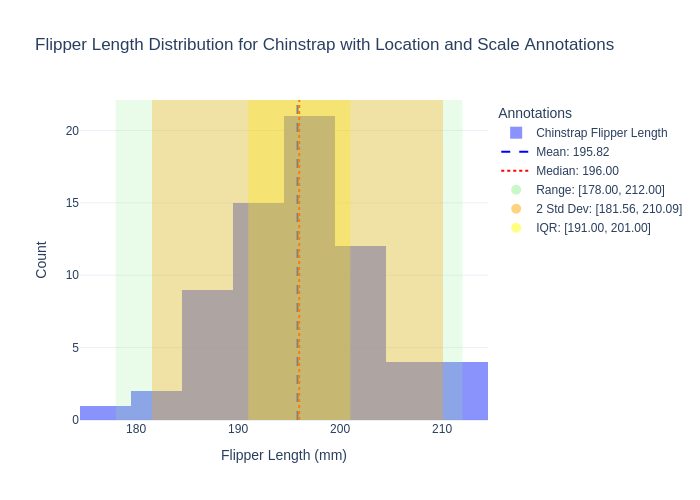

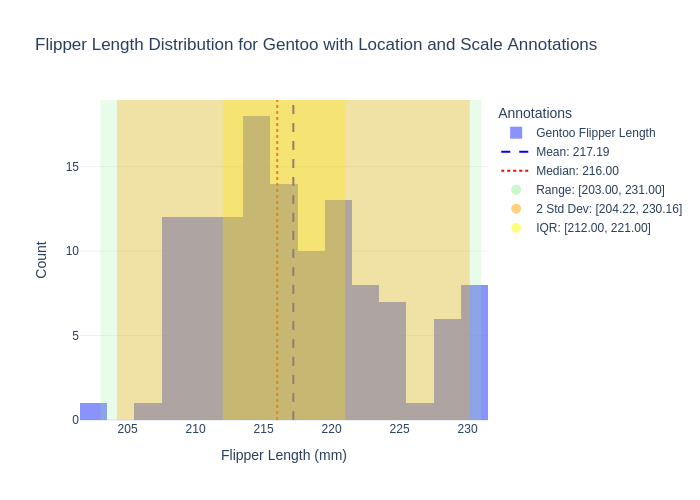

In [22]:
#Q1
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create a list of species to loop over
species_list = penguins['species'].unique()

# Loop over each species and create a separate figure
for species in species_list:
    species_data = penguins[penguins['species'] == species]
    flipper_length = species_data['flipper_length_mm']
    
    # Location metrics
    mean_fl = flipper_length.mean()
    median_fl = flipper_length.median()
    
    # Scale metrics
    min_fl = flipper_length.min()
    max_fl = flipper_length.max()
    q1 = np.percentile(flipper_length, 25)
    q3 = np.percentile(flipper_length, 75)
    std_fl = flipper_length.std()
    
    # Create a histogram for this species
    fig = go.Figure()
    
    # Histogram trace
    fig.add_trace(
        go.Histogram(
            x=flipper_length,
            name=f'{species} Flipper Length',
            opacity=0.75
        )
    )
    
    # Invisible trace for mean (for the legend)
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None], 
            mode='lines',
            line=dict(color='blue', width=2, dash='dash'),
            name=f'Mean: {mean_fl:.2f}'
        )
    )
    
    # Invisible trace for median (for the legend)
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None], 
            mode='lines',
            line=dict(color='red', width=2, dash='dot'),
            name=f'Median: {median_fl:.2f}'
        )
    )
    
    # Invisible trace for range (for the legend)
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(color='lightgreen', size=10, opacity=0.5),
            name=f'Range: [{min_fl:.2f}, {max_fl:.2f}]'
        )
    )
    
    # Invisible trace for 2 standard deviations (for the legend)
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(color='orange', size=10, opacity=0.5),
            name=f'2 Std Dev: [{mean_fl - 2 * std_fl:.2f}, {mean_fl + 2 * std_fl:.2f}]'
        )
    )
    # Invisible trace for IQR (for the legend)
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(color='yellow', size=10, opacity=0.5),
            name=f'IQR: [{q1:.2f}, {q3:.2f}]'
        )
    )
    
    # Add line for mean
    fig.add_vline(
        x=mean_fl, 
        line=dict(color='blue', width=2, dash='dash')
    )
    
    # Add line for median
    fig.add_vline(
        x=median_fl, 
        line=dict(color='red', width=2, dash='dot')
    )
    
    # Add rectangle for range
    fig.add_vrect(
        x0=min_fl, x1=max_fl, 
        fillcolor="lightgreen", 
        opacity=0.2, 
        line_width=0
    )
    
    # Add rectangle for IQR
    fig.add_vrect(
        x0=q1, x1=q3, 
        fillcolor="yellow", 
        opacity=0.3, 
        line_width=0
    )
    
    # Add rectangle for 2 standard deviations
    fig.add_vrect(
        x0=mean_fl - 2 * std_fl, x1=mean_fl + 2 * std_fl, 
        fillcolor="orange", 
        opacity=0.3, 
        line_width=0
    )
    
    # Update layout for each species
    fig.update_layout(
        title_text=f'Flipper Length Distribution for {species} with Location and Scale Annotations',
        xaxis_title='Flipper Length (mm)',
        yaxis_title='Count',
        legend_title_text="Annotations",
        template='plotly_white'
    )
    
    # Show the figure
    fig.show(renderer="png")


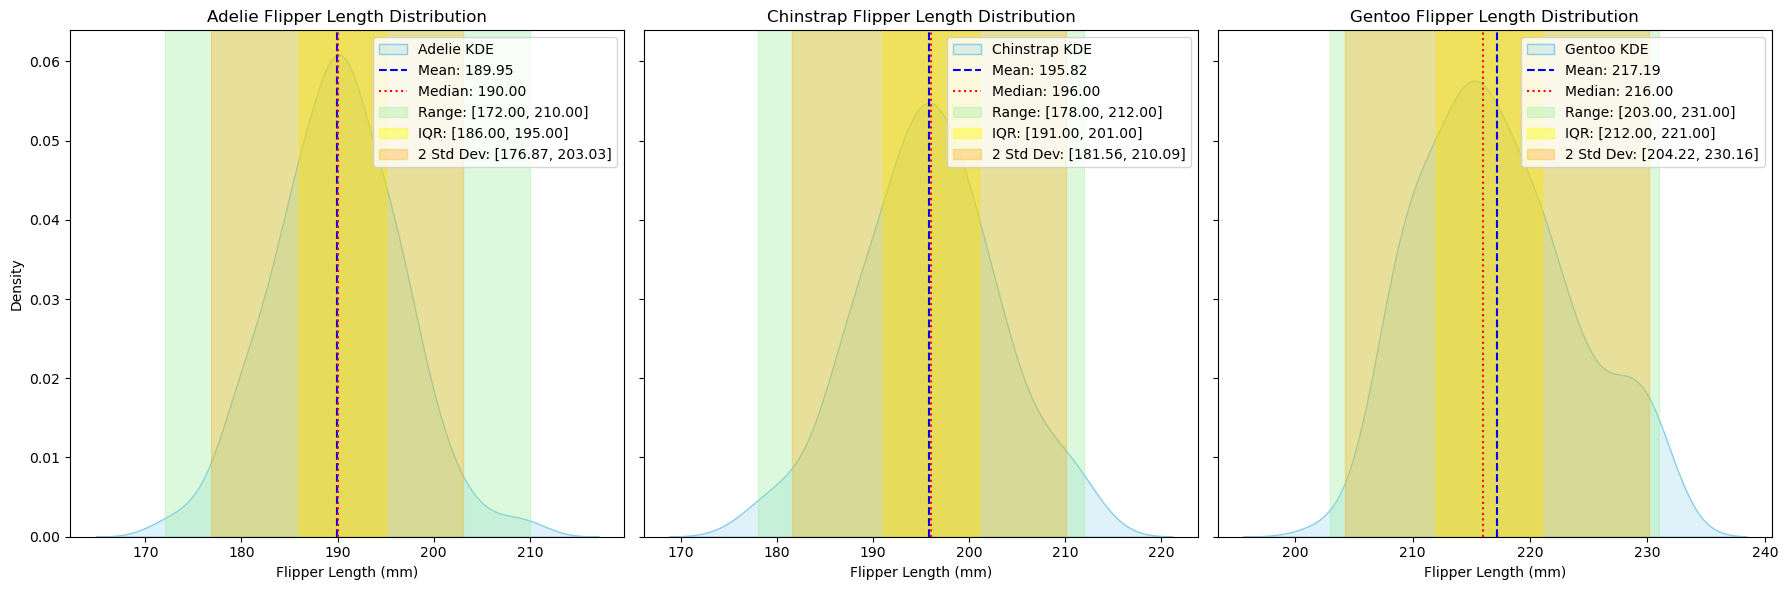

In [1]:
#Q2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create a list of species to loop over
species_list = penguins['species'].unique()

# Create subplots: one row, three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop over each species and create a KDE plot
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    flipper_length = species_data['flipper_length_mm']
    
    # Location metrics
    mean_fl = flipper_length.mean()
    median_fl = flipper_length.median()
    
    # Scale metrics
    min_fl = flipper_length.min()
    max_fl = flipper_length.max()
    q1 = np.percentile(flipper_length, 25)
    q3 = np.percentile(flipper_length, 75)
    iqr = q3 - q1
    std_fl = flipper_length.std()

    # Plot KDE using seaborn
    sns.kdeplot(flipper_length, ax=axes[i], fill=True, color='skyblue', label=f'{species} KDE')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_fl, color='blue', linestyle='--', label=f'Mean: {mean_fl:.2f}')
    axes[i].axvline(median_fl, color='red', linestyle=':', label=f'Median: {median_fl:.2f}')
    
    # Add shaded areas for range, IQR, and 2 standard deviations
    axes[i].axvspan(min_fl, max_fl, color='lightgreen', alpha=0.3, label=f'Range: [{min_fl:.2f}, {max_fl:.2f}]')
    axes[i].axvspan(q1, q3, color='yellow', alpha=0.4, label=f'IQR: [{q1:.2f}, {q3:.2f}]')
    axes[i].axvspan(mean_fl - 2 * std_fl, mean_fl + 2 * std_fl, color='orange', alpha=0.3, label=f'2 Std Dev: [{mean_fl - 2 * std_fl:.2f}, {mean_fl + 2 * std_fl:.2f}]')

    # Set plot title and labels
    axes[i].set_title(f'{species} Flipper Length Distribution')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Set a common y-axis label
axes[0].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


Q3
My preference for data visualization is the histogram, since even though it is dependent on bin size, with enough different bin sizes taken into account, one can construct a more accurate picture of the data, including its shape, then with a box plot or KDE. The reason I say "more accurate" is that each bin of a histogram is consistent in its meaning, whereas each x-value of a KDE is less concrete, so making specific observations from a KDE is more difficult.

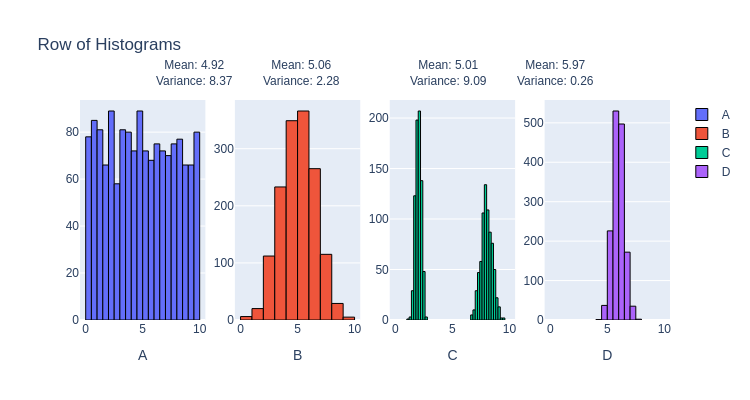

In [14]:
# Q4
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate mean and variance
mean_variance = [
    (np.mean(data1), np.var(data1)),
    (np.mean(data2), np.var(data2)),
    (np.mean(data3), np.var(data3)),
    (np.mean(data4), np.var(data4))
]

fig = make_subplots(rows=1, cols=4)

# Add histograms
fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

# Add mean and variance annotations
annotations = [
    f'Mean: {mean_variance[0][0]:.2f}<br>Variance: {mean_variance[0][1]:.2f}',
    f'Mean: {mean_variance[1][0]:.2f}<br>Variance: {mean_variance[1][1]:.2f}',
    f'Mean: {mean_variance[2][0]:.2f}<br>Variance: {mean_variance[2][1]:.2f}',
    f'Mean: {mean_variance[3][0]:.2f}<br>Variance: {mean_variance[3][1]:.2f}'
]

# Adjusted y-coordinates for better spacing
y_offset = 1.2  # Adjust this value as needed for vertical spacing

for i in range(4):
    fig.add_annotation(
        xref="paper", yref="paper",
        x=(i + 0.5) / 4, y=y_offset,  # Position above each plot
        text=annotations[i],
        showarrow=False,
        font=dict(size=12)
    )

# Update layout
fig.update_layout(height=400, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Q4:
4.1:
    Plots A and C have similar means and similar variances.
    
4.2:
    Plots A and B have almost identical means, but drastically different variances. Same goes for comparing B and C.
    
4.3:
    None of the plots have similar variances but quite different means.
    
4.4:
    Plots C and D (also A and D) have very different variances, and somewhat different means.
    

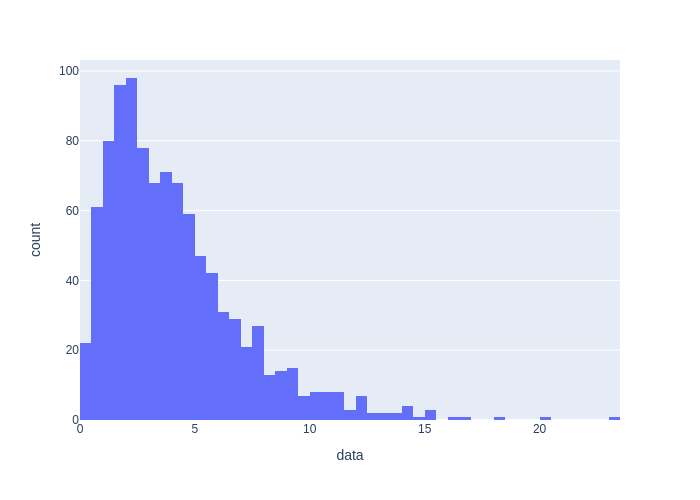

Mean:   4.158208666383969
Median: 3.4753354415162905


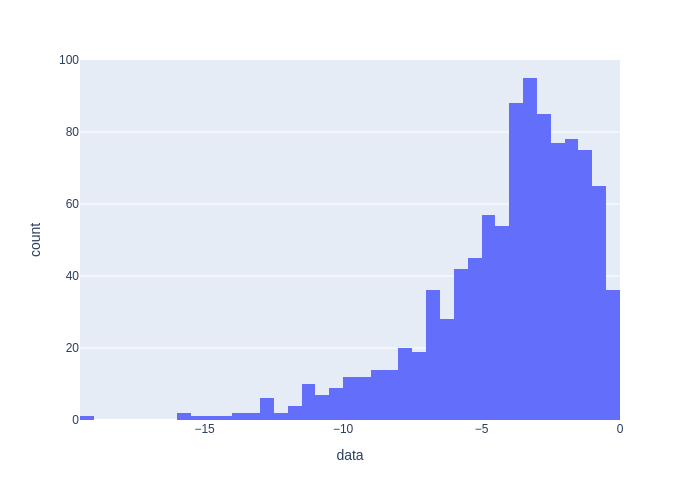

Mean:   -4.059109737155616
Median: -3.403936165019102


In [29]:
#Q5
import plotly.express as px
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

print(f'Mean:   {sample1.mean()}\nMedian: {np.quantile(sample1, [0.5])[0]}')

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

print(f'Mean:   {sample2.mean()}\nMedian: {np.quantile(sample2, [0.5])[0]}')

Q5

After displaying the histograms, statistics, and speaking with a ChatBot, I can describe the consequences of a left or right skew:

Right Skew: A right skew "pulls" the mean upwards, greater than the median, due to abnormally (pun) large values to the right of the central distribution.

Left Skew: A left skew "pulls" the mean downwards, lesser than the median, due to abnormally small values to the left of the central distribution.

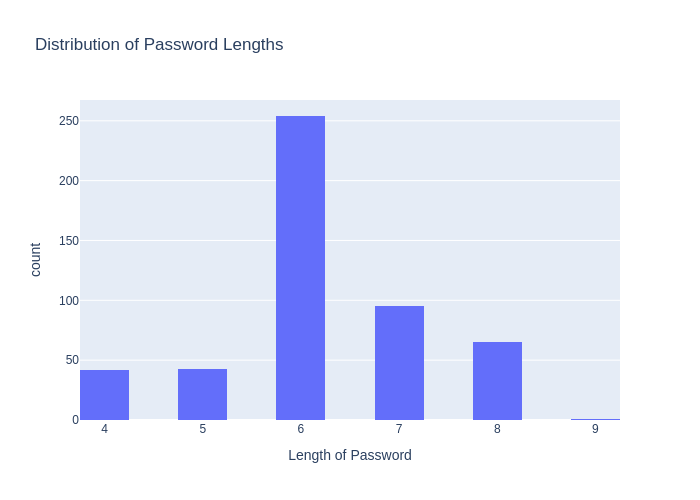

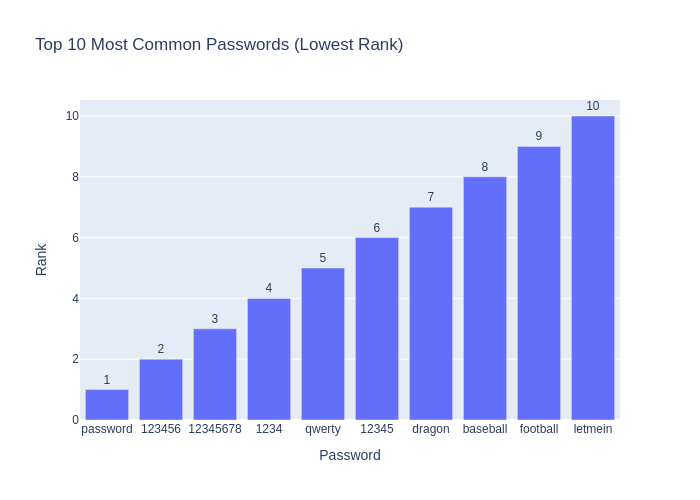

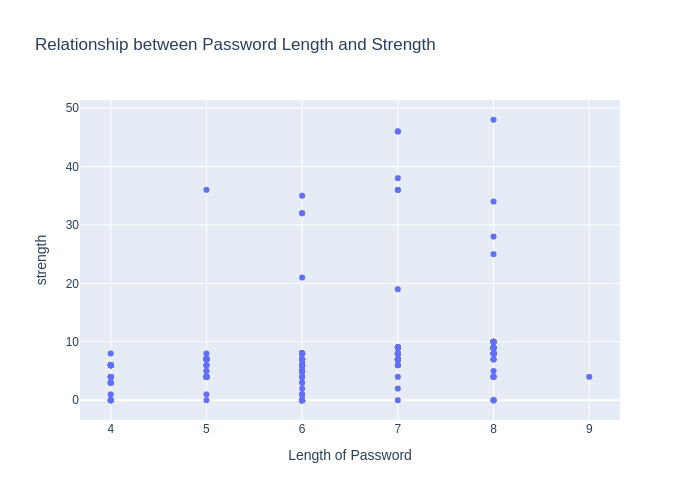

In [38]:
#Q6
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-01-14/passwords.csv"
passwords = pd.read_csv(url)

# Plotting the frequency of password lengths
passwords['length'] = passwords['password'].str.len()
fig_length = px.histogram(passwords, x='length', title='Distribution of Password Lengths', 
                           labels={'length': 'Length of Password'}, 
                           nbins=20)
fig_length.show(renderer="png")

# Plotting the top 10 most common passwords based on rank
top_passwords = passwords.nsmallest(10, 'rank')[['password', 'rank']]
fig_top_passwords = px.bar(top_passwords, x='password', y='rank', 
                            title='Top 10 Most Common Passwords (Lowest Rank)',
                            labels={'rank': 'Rank', 'password': 'Password'})
fig_top_passwords.update_traces(texttemplate='%{y}', textposition='outside')
fig_top_passwords.show(renderer="png")

# Visualizing the relationship between password length and its value
fig_length_value = px.scatter(passwords, x='length', y='strength', 
                               title='Relationship between Password Length and Strength',
                               labels={'length': 'Length of Password', 'value': 'Strength of password'})
fig_length_value.show(renderer="png")


Q6

What's interesting about the passwords dataset, displayed above, is the quantity of certain lengths of popular passwords.

People seem to feel that 4 and 5-character passwords are silly (which is true), but then believe that 6 characters is enough. Past that, people see every extra character as less appealing to include in their password, and we can see the frequency steadily fall off.

Another interesting observation we can make is that the strength of the password doesn't exhibit any clear trends when compared to the password length. This happens because the sample taken is intentionally biased (most popular passwords), thus skewing the data to universally known and weak passwords.

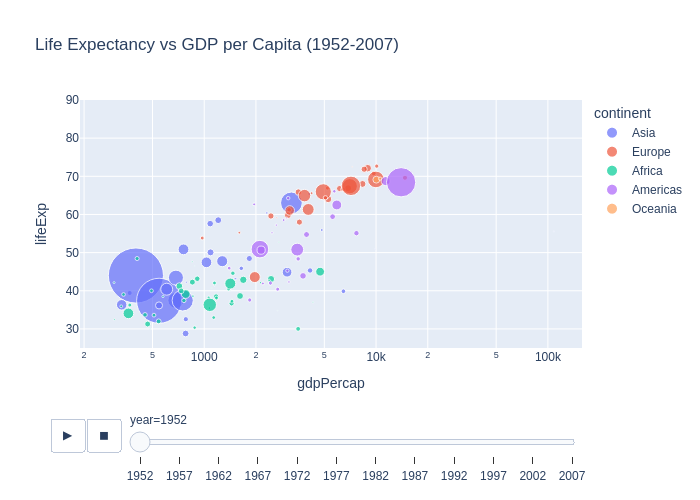

In [41]:
#Q7
import plotly.express as px
import pandas as pd

# Load the Gapminder dataset
df = px.data.gapminder()

# Create the animated bubble chart
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=60,
    range_y=[25, 90],
    title="Life Expectancy vs GDP per Capita (1952-2007)",
)

# Show the figure
fig.show(renderer="png")
fig.show()


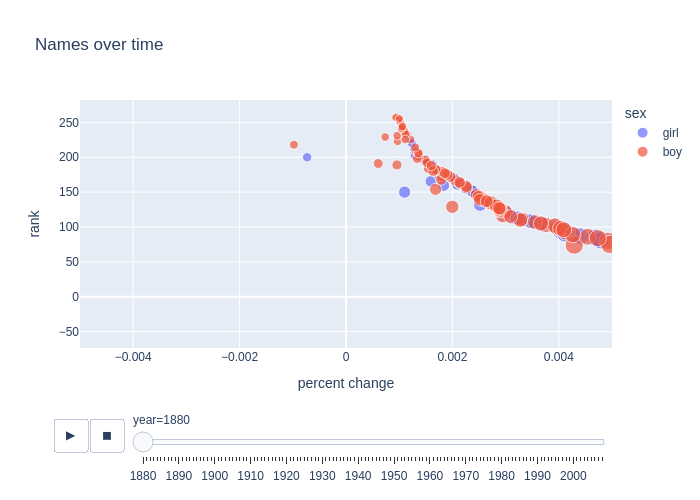

In [53]:
#Q8

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names

# Create the animated bubble chart
fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    animation_frame="year",
    animation_group="name",
    size="percent",
    size_max=50,
    range_x=[-0.005,0.005],
    color="sex",
    hover_name="name",
    title="Names over time",
)

# Show the figure
fig.show(renderer="png")
fig.show()


Q9: No

###### ChatBot conversation for Questions 1-3: https://chatgpt.com/share/66f60dfd-0498-8010-8913-6dfb27537e97

Summary
---

**1. Box Plots**:
   - **Description**: Box plots summarize data using five key statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. They also highlight outliers.
   - **Best for**: Summarizing the distribution of **continuous, quantitative data**, especially for comparing across multiple categories.
   - **Pros**:
     - Effectively shows spread, central tendency, and outliers.
     - Useful for comparing distributions across categories.
   - **Cons**:
     - Doesn’t show the full distribution shape.
     - Can be hard to interpret for small datasets or for those unfamiliar with quartiles.

**2. Histograms**:
   - **Description**: Histograms display the frequency distribution of **continuous, quantitative data** by grouping it into intervals (bins).
   - **Best for**: Visualizing the **shape of the distribution** of continuous data and identifying where most data points fall.
   - **Pros**:
     - Simple and intuitive for visualizing data distribution.
     - Shows mode, skewness, and spread.
   - **Cons**:
     - Results depend heavily on bin size, which can change the interpretation.
     - Less effective for small datasets or discrete data.

**3. KDEs (Kernel Density Estimation)**:
   - **Description**: KDEs are smooth curves that estimate the probability density of a continuous variable. They provide a smoothed view of data distribution without binning.
   - **Best for**: Inferring the **underlying population distribution** from a sample of **continuous data**.
   - **Pros**:
     - Smooth, continuous representation of the data’s distribution.
     - Identifies multiple modes (peaks) more easily than histograms.
   - **Cons**:
     - Sensitive to bandwidth (smoothing) parameter; improper choice can lead to over- or under-smoothing.
     - Can be misleading for small datasets due to over-interpretation of the smooth curve.

---

### Key Takeaways:
- **Box plots** are ideal for comparing groups and summarizing spread, but less effective for showing exact distribution shape.
- **Histograms** are great for understanding the frequency distribution of continuous data, but require careful binning choices.
- **KDEs** provide a smooth estimation of the distribution but can be tricky to interpret for small datasets or with inappropriate bandwidth settings.


ChatBot conversation for question 4: https://chatgpt.com/share/66f6125c-82d8-8010-8f88-67aefaf71705

---

### Summary of Conversation

1. **Code Modification Request**:
   - The user provided a Python code snippet that creates histograms using Plotly and requested modifications to display the mean and variance of each dataset above the corresponding plots.

2. **Code Implementation**:
   - I provided an updated version of the code that included annotations for the mean and variance of four datasets. The annotations were positioned above the histograms to avoid overlap.

3. **Difference Between Parameters and Statistics**:
   - We discussed the distinction between parameters and statistics:
     - **Parameters**: Numerical values that summarize characteristics of a population (e.g., population mean, variance). They are fixed but typically unknown.
     - **Statistics**: Numerical values calculated from a sample of data (e.g., sample mean, variance) that estimate the corresponding parameters. They can vary between samples.

4. **Key Differences**: 
   - Parameters describe entire populations, while statistics describe samples and are used to infer properties about the population.

---

ChatBot conversation for questions 5 and 6: https://chatgpt.com/share/66f62248-c15c-8010-8e69-324f2a91752e


### Summary of Conversation

1. **Data Exploration and Visualization**:
   - We discussed a dataset containing information about passwords, specifically from the URL: `https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-01-14/passwords.csv`.
   - You highlighted the importance of the "rank" variable, which indicates how common each password is.

2. **Python Code for Visualization**:
   - I provided Python code using Plotly Express to visualize the data. The code included the following elements:
     - A histogram showing the distribution of password lengths.
     - A bar chart displaying the top 10 most common passwords based on their rank (using the `nsmallest` method).
     - A scatter plot to visualize the relationship between password length and the "value" variable.

3. **Modifications to the Code**:
   - Upon your request, I updated the code to remove the dot plot that compared password length to frequency, replacing it with a scatter plot comparing password length to its "value".

4. **Understanding Mean, Median, and Skewness**:
   - We briefly discussed the relationship between mean, median, and skewness in distributions, explaining how right-skewed distributions typically have a mean greater than the median, while left-skewed distributions show the opposite pattern.

---

ChatBot conversation for questions 7 and 8: https://chatgpt.com/share/66f62804-6f0c-8010-acf6-183f29bfe147


**Summary of Conversation:**

1. **Statistical Visualizations**: We discussed the differences between various statistical visualizations, particularly focusing on box plots, histograms, and kernel density estimates (KDEs). You noted that:
   - **Box Plots** are best suited for discrete, qualitative data.
   - **Histograms** are ideal for continuous, quantitative data.
   - **KDEs** are used to infer population structure from sample data.

2. **Datasets of Interest**: You expressed interest in the 'penguins.csv' dataset from Seaborn and the 'passwords.csv' dataset from a Tidy Tuesday collection. You highlighted that the 'rank' variable in the password dataset indicates how common the passwords are.

3. **Recreating Hans Rosling's Animation**: You requested assistance in recreating Hans Rosling's classic statistical animation showcasing 200 countries over 200 years. I provided a code snippet using Plotly Express to create an animated bubble chart based on the Gapminder dataset, which demonstrates changes in GDP per capita and life expectancy over time.

---